In [1]:

import os
import numpy as np
from formatData import loadData
from sklearn.model_selection import train_test_split
from coulombToTraj import *

2023-03-20 14:12:44.402725: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
xyz_files_dir_name = "/home/panthibivek/thesis/GAN_pkg/data/AllMolecules/"
xyz_traj_filename = "/home/panthibivek/thesis/GAN_pkg/data/traj.xyz"
print("Loading Lower Coulomb representation and respective energies")
molRep2D, _ = loadData(12, xyz_traj_filename)

molRep2D_without_diagonal = []
diagonal_index = [1,3,6,10,15,21,28,36,45,55,66,78]
index = np.array([i-1 for i in range(1,78) if i not in diagonal_index])

for each_molRep2D in molRep2D:
    each_molRep2D_without_diagonal = each_molRep2D[index]
    molRep2D_without_diagonal.append(each_molRep2D_without_diagonal)
molRep2D_without_diagonal = np.array(molRep2D_without_diagonal)

# charge of all atoms in benzene
atomic_charge = np.repeat(np.array([[6,6,6,6,6,6,1,1,1,1,1,1]]), len(molRep2D), axis=0)
molRep2D_with_atomic_charge = np.concatenate((atomic_charge, molRep2D_without_diagonal), axis=1)

flatened_xyz = np.array(getFlattenedXyz(xyz_files_dir_name))
X_train, X_test, y_train, y_test = train_test_split(molRep2D_with_atomic_charge, flatened_xyz,
                                test_size=0.7)
model = getModel()
history = model.fit(X_train, y_train, epochs=500)

Loading Lower Coulomb representation and respective energies
input data size: (10000, 78)
output data size: (10000,)


2023-03-20 14:12:49.415421: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:843] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-20 14:12:49.415494: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:843] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-20 14:12:49.467465: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:843] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-20 14:12:49.467534: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:843] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-20 14:12:49.467575: I tensorflow/compiler/xla/stream_executo

Epoch 1/500


2023-03-20 14:12:49.684040: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-20 14:12:49.687479: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-20 14:12:49.691429: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-20 14:12:49.694396: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


29/94 [========>.....................] - ETA: 0s - loss: 18.8306

2023-03-20 14:12:50.426399: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


94/94 [==============================] - 1s 5ms/step - loss: 12.0810
Epoch 2/500
31/94 [========>.....................] - ETA: 0s - loss: 5.8609

2023-03-20 14:12:50.949748: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-20 14:12:50.950839: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-20 14:12:50.951363: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-20 14:12:50.952785: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


94/94 [==============================] - 1s 5ms/step - loss: 5.0090
Epoch 3/500
94/94 [==============================] - 1s 5ms/step - loss: 3.5588
Epoch 4/500
94/94 [==============================] - 1s 6ms/step - loss: 3.1612
Epoch 5/500
94/94 [==============================] - 0s 5ms/step - loss: 2.8339
Epoch 6/500
94/94 [==============================] - 0s 5ms/step - loss: 2.6965
Epoch 7/500
94/94 [==============================] - 0s 5ms/step - loss: 2.6156
Epoch 8/500
94/94 [==============================] - 1s 5ms/step - loss: 2.5629
Epoch 9/500
94/94 [==============================] - 1s 6ms/step - loss: 2.4858
Epoch 10/500
94/94 [==============================] - 1s 6ms/step - loss: 2.4161
Epoch 11/500
94/94 [==============================] - 1s 6ms/step - loss: 2.3690
Epoch 12/500
94/94 [==============================] - 0s 5ms/step - loss: 2.3654
Epoch 13/500
94/94 [==============================] - 0s 5ms/step - loss: 2.3749
Epoch 14/500
94/94 [============================

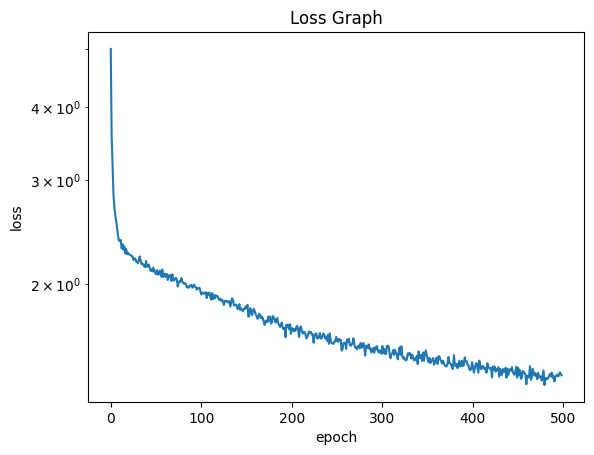

In [3]:
from matplotlib import pyplot as plt
loss_arr = history.history['loss']
plt.plot(loss_arr[1:])
plt.yscale('log')
plt.title('Loss Graph')
plt.ylabel('loss')
plt.xlabel('epoch')
fig1 = plt.gcf()
plt.show()
fig1.savefig('coulomb_to_xyz_loss.png', dpi = 300)


In [30]:
result = model.predict(X_test)
print()
print("Deviation:", np.std(y_test - result))
print("MSE: ", np.mean((y_test - result)**2))

 72/219 [========>.....................] - ETA: 0s

2023-03-20 15:35:28.127993: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-20 15:35:28.138232: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-20 15:35:28.146529: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-20 15:35:28.153612: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-20 15:35:28.157912: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-20 15:35:28.160193: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


219/219 [==============================] - 0s 2ms/step

Deviation: 1.364213854101674
MSE:  1.872388306536515
